Convolutional Neural Network > Recurral Nerual Network in sequential types of data
Convolutional Neural network accepts 2D input, 3D inputs
convolution Kernal - windows
first layer of convolution filters - tend to find things lik edges or curves 
    looking at combinations of pixels i.e. why it only finds corner or edge
next layer - more complex features that edges and curves build 
    i.e. circle square
next layer find combination of cirlces and squares (a bit more complicated)
kernal slides window over the entire image and contensing the image
after doing convolution - ne condensed version of image
Pooling - pooling has a window like nernal
Max pooling - inside the kernal takes the maximum value
summary - convolutional network - drastically simplifying your image and looks for features of the image.
Generally you will have 2-4 layers of the convolutional layers
CNN - reducing your image to basic building blocks and then find patterns of those blocks given how many layers you have


In [19]:
import os
import cv2
import numpy as np
from tqdm import tqdm

#in your pre-processing dataset you dont want to build data everytime you run your code
REBUILD_DATA = True

class DogsVSCats():
    #first, specify the size of the image i.e. 50 by 50
    #input images vary in sizes and shape (some are portrait, some are landscape) - we need them to uniform on input
    # normalised to the same size
    # resizing the images or resize and pad (adding white / black pixels on smaller images with open cv)
    #shift over and crop the image, rotate or flip them
    IMG_SIZE = 50
    CATS = "kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS = "kagglecatsanddogs_3367a/PetImages/Dog"
    #Pre-labelled data
    LABELS ={CATS: 0, DOGS: 1}
    # massive list of images with their label
    training_data = []
    cat_count = 0
    dog_count = 0
        
    def make_training_data(self):
        for label in self.LABELS:
            print("directory: ",label)
            #looping all the images in the directory
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    #convert to grayscale - don't have to in CNN compared to FF NN
                    #Dense layer or a linear layer / full connected layer will require you to pass flattened data
                    # creating a 2D Convolution Neural Network
                    # color doesn't add another dimention - color adds channels - added data we don't need
                    # is color a relavant feature or defiant
                    # things that are different between cat and dogs are patterns
                    # always simplify nerual networks & smaller possible
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    #labelled data to one hot vector from scaler
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    # Any one class should be relatively close to the other one in count
                    # if one class dominates the data - nerual network is going to optimise that one class and get stuck
                    if label == self.CATS:
                        self.cat_count += 1
                    elif label == self.DOGS:
                        self.dog_count += 1
                except Exception as e:
                    pass
                    #print(str(e))
                    
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.cat_count)
        print("Dogs:", self.dog_count)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
            
    

  1%|          | 127/12501 [00:00<00:09, 1268.85it/s]

directory:  kagglecatsanddogs_3367a/PetImages/Cat


  1%|          | 108/12501 [00:00<00:11, 1079.02it/s]

directory:  kagglecatsanddogs_3367a/PetImages/Dog


100%|██████████| 12501/12501 [00:10<00:00, 1181.88it/s]


Cats: 12476
Dogs: 12470


In [8]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [11]:
print(training_data[5])

[array([[173, 174, 118, ...,  59,  86,  25],
       [169,  49,  43, ...,  53,  85,  62],
       [ 46,  44,  46, ...,  87, 133,  82],
       ...,
       [142, 144, 139, ..., 183, 175, 174],
       [148, 152, 147, ..., 182, 176, 175],
       [138, 140, 139, ..., 179, 182, 176]], dtype=uint8)
 array([0., 1.])]


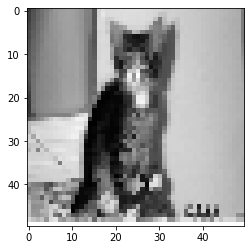

[1. 0.]


In [18]:
import matplotlib.pyplot as plt
index = 6
plt.imshow(training_data[index][0], cmap= "gray")
plt.show()
print(training_data[index][1])